#### <center>Intermediate Python and Software Enginnering</center>


## <center>Section 09 - Object Orientation - Exercise Solutions 2</center>


### <center>Innovation Scholars Programme</center>
### <center>King's College London, Medical Research Council and UKRI <center>

### Exercises - Part 02

The purpose of this exercise is to practice inheritance and other concepts in an object oriented system.

We want to create a graphics library which renders to matplotlib. Our library will use figure classes to represent polygons and other geometric objects. We've provided some code but there much more to implement, taking care to consider what design patterns to employ.

In [4]:
# create a graphics library that renders to matplotlib
from math import pi, cos, sin
import numpy as np

# Same class as the one implemented during the first session
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)

    def __mul__(self, other):
        if isinstance(other, Point):
            return Point(self.x * other.x, self.y * other.y)
        else:
            return Point(self.x * other, self.y * other)

    def getx(self):
        return self.x

    def gety(self):
        return self.y

    def __rmul__(self, other):
        return Point.__mul__(self, other)

    def __truediv__(self, other):
        return Point(self.x / other.x, self.y / other.y)

    def __str__(self):
        return "({}, {})".format(self.x, self.y)

    def __repr__(self):
        return "Point" + self.__str__() + ""

    def __getitem__(self, index):
        if index not in (0, 1):
            raise IndexError("index is out of range")

        return self.x if index == 0 else self.y

    def __iter__(self):
        yield self.x
        yield self.y

    def closest_point(self, p0, p1):
        v01 = p1 - p0
        v20 = p0 - self
        t = -(v20.x * v01.x + v20.y * v01.y) / (v01.x ** 2 + v01.y ** 2)
        pt = t * p1 + (1 - t) * p0
        return pt

    @staticmethod
    def interleave(*points):
        return tuple(zip(*points))


class Shape:
    def area(self):
        """Calculate the area of the figure"""
        raise NotImplemented

    def draw_me(self, context):
        """
        Visit the internal nodes of this shape and pass them to the context. The context object
        is a callable which accepts the nodes defining the polygon to render, passing self.nodes()
        will suffice for simple shapes but not a compound shape.
        """
        context(self.nodes())

    def nodes(self):
        """Return the ndoes composing this shape."""
        return ()


class Triangle(Shape):
    def __init__(self, p0, p1, p2):
        self.p0 = p0
        self.p1 = p1
        self.p2 = p2

    def area(Shape):
        b = (self.p1 - self.p0).length()
        pt = Point.closest_point(self.p2, self.p0, self.p1)
        h = (pt - self.p2).length()
        return b * h / 2

    def nodes(self):
        return self.p0, self.p1, self.p2


class Square(Shape):
    def __init__(self, topLeft, bottomRight):
        self.topLeft = topLeft
        self.bottomRight = bottomRight

    def area(self):
        heighwidth = self.bottomRight - self.topLeft
        return heighwidth.x * heighwidth.y

    def nodes(self):
        return (
            self.topLeft,
            Point(self.bottomRight.x, self.topLeft.y),
            self.bottomRight,
            Point(self.topLeft.x, self.bottomRight.y),
        )


class Circle(Shape):
    def __init__(self, pCentre, radius):
        self.pCentre = pCentre
        self.radius = radius

    def area(self):
        return pi * (self.radius ** 2)

    def nodes(self):
        return [
            Point(cos(a), sin(a)) * self.radius + self.pCentre
            for a in np.linspace(0, pi * 2, 40)
        ]


class Compound(Shape):
    def __init__(self, *shapes):
        self.shapes = shapes

    def area(self):
        return sum(lambda s: s.area(), self.shapes)

    def draw_me(self, context):
        for shape in self.shapes:
            shape.draw_me(context)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

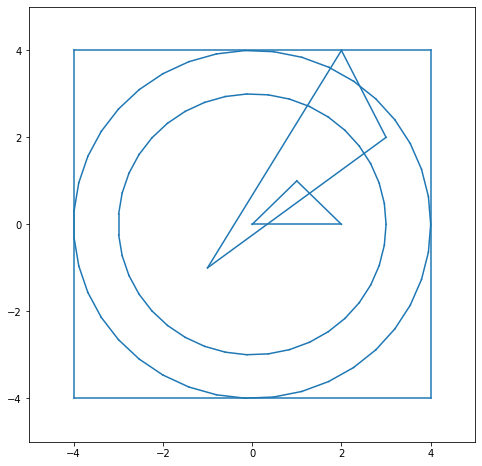

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


class MaplotlibRenderer:
    def __init__(self):
        self.shapes = []

    def addShape(self, shape):
        self.shapes.append(shape)

    def render(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xlim(-5, 5)
        ax.set_ylim(-5, 5)

        def context(nodes):
            for n0, n1 in zip(nodes, nodes[1:] + nodes[:1]):
                ptxs, ptys = Point.interleave(n0, n1)
                line = plt.Line2D(ptxs, ptys)
                ax.add_line(line)

        for shape in self.shapes:
            shape.draw_me(context)

        return fig, ax


rnd = MaplotlibRenderer()
rnd.addShape(Triangle(Point(0, 0), Point(2, 0), Point(1, 1)))
rnd.addShape(Triangle(Point(-1, -1), Point(3, 2), Point(2, 4)))
rnd.addShape(Circle(Point(0, 0), 3))
rnd.addShape(Compound(Circle(Point(0, 0), 4), Square(Point(4, 4), Point(-4, -4))))

rnd.render()